In [1]:
#Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns

# Import API key
from api_keys import api_key


In [2]:
import json

# creating api call from a city though url 
base_url = "https://api.fda.gov/drug/event.json?api_key=" + api_key

#base_url="https://api.ers.usda.gov/data/arms/category?api_key=" + api_key + "&id=age,ftypll"
#https://api.ers.usda.gov/data/arms/farmtype?api_key=YOUR_API_KEY&name=operator+households
# changing the output to json 
print(base_url)
req = requests.get(base_url)
data = req.json()
print(data)

https://api.fda.gov/drug/event.json?api_key=8CNbFdll08EsavhOoWDSJ204sBafUl3X75goqqpT
{'meta': {'disclaimer': 'Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.', 'terms': 'https://open.fda.gov/terms/', 'license': 'https://open.fda.gov/license/', 'last_updated': '2021-11-04', 'results': {'skip': 0, 'limit': 1, 'total': 14128106}}, 'results': [{'receiptdateformat': '102', 'receiver': None, 'seriousnessdeath': '1', 'companynumb': 'JACAN16471', 'receivedateformat': '102', 'primarysource': {'reportercountry': 'CANADA', 'qualification': '3'}, 'transmissiondateformat': '102', 'fulfillexpeditecriteria': '1', 'safetyreportid': '5801206-7', 'sender': {'senderorganization': 'FDA-Public Use'}, 'receivedate': '20080707', 'patient': {'patientonsetage': '26', 'patientonsetageunit': '801', 

In [3]:
cats_data = {'gender':[],
                'age':[],
                'weight':[],
                'breed':[],
                'drug':[],
                'outcome':[],
                'date_in':[]}
#base_url = "https://api.fda.gov/drug/event.json?api_key=" + api_key + '"search=animal.species:"Cat""'
base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+animal.breed.breed_component='Domestic Shorthair'"
req = requests.get(base_url)
data = req.json()

#print(data)
#https://api.fda.gov/animalandveterinary/event.json?search=animal.species:"Cat"
#if data['animal']['species']=="Cat":
cats_data['gender'].append(data['results'][0]['animal']['gender'])
cats_data['age'].append(data['results'][0]['animal']['age']['min'])
cats_data['weight'].append(data['results'][0]['animal']['weight']['min'])
cats_data['breed'].append(data['results'][0]['animal']['breed']['breed_component'])
cats_data['drug'].append(data['results'][0]['drug'][0]['active_ingredients'][0]['name'])
cats_data['outcome'].append(data['results'][0]['outcome'][0]['medical_status'])
cats_data['date_in'].append(data['results'][0]['original_receive_date'])

print(cats_data)


{'gender': ['Male'], 'age': ['10.00'], 'weight': ['6.350'], 'breed': ['Domestic Shorthair'], 'drug': ['Spinosad'], 'outcome': ['Recovered/Normal'], 'date_in': ['20170508']}


In [4]:
# option for looping - force it to skip 5 and then pick up the next one. The for loop returns 20 cats.
cats_data = {'gender':[],
                'age':[],
                'weight':[],
                'breed':[],
                'drug':[],
                'outcome':[],
                'date_in':[]}
base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+(animal.breed.breed_component='Domestic Shorthair'+OR+animal.breed.breed_component='Domestic Longhair')"
counter = 1
for i in range(500):

#base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+animal.breed.breed_component='Domestic Shorthair'"
#base_url = "https://api.fda.gov/drug/event.json?api_key=" + api_key
#base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+original_receive_date:[20040101+TO+20161107]&limit=1"
    req = requests.get(base_url)
    data = req.json()

    try:
        cats_data['age'].append(data['results'][0]['animal']['age']['min'])
    except:
        cats_data['age'].append('0')
    
    try:
        cats_data['weight'].append(data['results'][0]['animal']['weight']['min'])
    except:
        cats_data['weight'].append('0')

    try:
        cats_data['outcome'].append(data['results'][0]['outcome'][0]['medical_status'])
    except:
        cats_data['outcome'].append('Unknown')
    
    try:
        cats_data['date_in'].append(data['results'][0]['original_receive_date'])
    except:
        cats_data['date_in'].append(np.nan)

    try:
        cats_data['gender'].append(data['results'][0]['animal']['gender'])
    except:
        cats_data['gender'].append('Unknown')
    
    try:
        cats_data['breed'].append(data['results'][0]['animal']['breed']['breed_component'])
    except:
        cats_data['breed'].append('Unknown')
    
    try:
        cats_data['drug'].append(data['results'][0]['drug'][0]['active_ingredients'][0]['name'])
    except:
        cats_data['drug'].append('Unknown')
        
        
    counter +=1
    str_count = str(counter)
    base_url = "https://api.fda.gov/animalandveterinary/event.json?search=animal.species=Cat+(animal.breed.breed_component='Domestic Shorthair'+OR+animal.breed.breed_component='Domestic Longhair')&skip=" + str_count
    
print(cats_data)

{'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Unknown', 'Male', 'Female', 'Unknown', 'Male', 'Unknown', 'Female', 'Male', 'Male', 'Male', 'Male', 'Unknown', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Unknown', 'Unknown', 'Unknown', 'Male', 'Unknown', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Unknown', 'Male', 'Male', 'Male', 'Unknown', 'Mixed', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Unknown', 'Female', 'Male', 'Unknown', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Unknown', 'Female', 'Female', 'Male', 'Fem

In [5]:
cat_df = pd.DataFrame.from_dict(cats_data)
cat_df.to_csv("cat_data.csv")
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   gender   500 non-null    object
 1   age      500 non-null    object
 2   weight   500 non-null    object
 3   breed    500 non-null    object
 4   drug     500 non-null    object
 5   outcome  500 non-null    object
 6   date_in  500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [6]:
cat_df.head(40)

,gender,age,weight,breed,drug,outcome,date_in
0,Male,10.00,6.350,Domestic Shorthair,Spinosad,Recovered/Normal,20170508
1,Female,12.00,3.130,Domestic Shorthair,Cefovecin,Ongoing,20171002
2,Male,1.00,4.309,Domestic Shorthair,Spinosad,Recovered/Normal,20180205
3,Female,9.00,0,Domestic Shorthair,Imidacloprid,Outcome Unknown,20190327
4,Male,5.00,6.577,Domestic Shorthair,Maropitant Citrate,Ongoing,20190220
5,Male,2.00,5.897,Domestic Shorthair,Fluralaner Spot-On Solution,Ongoing,20190721
6,Male,8.00,8.845,Domestic Longhair,Spinosad,Recovered/Normal,20190307
7,Unknown,0,0,Cat (unknown),Imidacloprid,Recovered/Normal,20210503
8,Male,9.00,4.309,Domestic Shorthair,Fluralaner Spot-On Solution,Ongoing,20200515
9,Female,11.00,2.722,Cat (unknown),Imidacloprid,Outcome Unknown,20210518


In [16]:
cat_df["date_in"] = pd.to_datetime(cat_df["date_in"])
#cat_df.head(15)
cat_df["Year"] = cat_df['date_in'].dt.year
cat_df.head(15)

,gender,age,weight,breed,drug,outcome,date_in,Year
0,Male,10.0,6.350,Domestic Shorthair,Spinosad,Recovered/Normal,2017-05-08,2017
1,Female,12.0,3.130,Domestic Shorthair,Cefovecin,Ongoing,2017-10-02,2017
2,Male,1.0,4.309,Domestic Shorthair,Spinosad,Recovered/Normal,2018-02-05,2018
3,Female,9.0,0.000,Domestic Shorthair,Imidacloprid,Outcome Unknown,2019-03-27,2019
4,Male,5.0,6.577,Domestic Shorthair,Maropitant Citrate,Ongoing,2019-02-20,2019
5,Male,2.0,5.897,Domestic Shorthair,Fluralaner Spot-On Solution,Ongoing,2019-07-21,2019
6,Male,8.0,8.845,Domestic Longhair,Spinosad,Recovered/Normal,2019-03-07,2019
7,Unknown,0.0,0.000,Cat (unknown),Imidacloprid,Recovered/Normal,2021-05-03,2021
8,Male,9.0,4.309,Domestic Shorthair,Fluralaner Spot-On Solution,Ongoing,2020-05-15,2020
9,Female,11.0,2.722,Cat (unknown),Imidacloprid,Outcome Unknown,2021-05-18,2021


In [34]:
cat_type = cat_df['breed'].value_counts()
cat_type

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


Domestic Shorthair                          189
Domestic (unspecified)                      163
Cat (unknown)                                66
Domestic Mediumhair                          27
Domestic Longhair                            26
Cat (other)                                  10
Mixed (Cat)                                   6
American Shorthair                            2
Crossbred Feline/cat                          2
[Maine Coon, Cat (other)]                     1
Abyssinian cat                                1
Unknown                                       1
Scottish Fold Shorthair                       1
[Cat (other), Cat (other), Cat (other)]       1
[Domestic Shorthair, Domestic Shorthair]      1
[Siamese, Mixed (Cat)]                        1
[Domestic Longhair, Maine Coon]               1
British cat                                   1
Name: breed, dtype: int64

In [25]:
drug_type = cat_df['drug'].unique()
drug_type

array(['Spinosad', 'Cefovecin', 'Imidacloprid', 'Maropitant Citrate',
       'Fluralaner Spot-On Solution', 'Praziquantel', 'Griseofulvin',
       'Selamectin', 'Pradofloxacin',
       'Amoxicillin As Amoxicillin Trihydrate; Clavulanate Potassium ( K-Clavulanate)',
       'Pyrantel Pamoate', 'Enrofloxacin', 'Ketamine Hydrochloride',
       'Bacitracin, Neomycin, Polymyxin B', 'Cyclosporine', 'Lufenuron',
       'Butorphanol Tartrate', 'Epsiprantel', 'Nitenpyram', 'Meloxicam',
       'Atipamezole', 'Emodepside, Praziquantel', 'Cefovecin Sodium',
       'Robenacoxib', 'Atipamezole Hydrochloride', 'Mirtazapine',
       'Selamectin;Sarolaner', 'Buprenorphine', 'Itraconazole',
       'Recombinant Human Insulin', 'Amoxicillin, Clavulanate',
       'Aminopentamide', 'Dexmedetomidine Hydrochloride', 'Propofol',
       'Clindamycin Hydrochloride', 'Furosemide', 'Tiletamine, Zolazepam',
       'Imidacloprid, Moxidectin', 'Human Insulin', 'Cyclosporine A',
       'Pentobarbital, Phenytoin', 'Acep

In [36]:
bd = cat_df[["breed", "drug"]]
bd

,breed,drug
0,Domestic Shorthair,Spinosad
1,Domestic Shorthair,Cefovecin
2,Domestic Shorthair,Spinosad
3,Domestic Shorthair,Imidacloprid
4,Domestic Shorthair,Maropitant Citrate
...,...,...
495,Domestic Shorthair,Selamectin
496,Domestic Shorthair,Spinosad
497,Cat (unknown),Praziquantel
498,Domestic Shorthair,Phytosphingosine Salicyloyl


In [38]:
dom_sh = cat_df[cat_df["breed"] == 'Domestic Shorthair']
dom_sh

,gender,age,weight,breed,drug,outcome,date_in,Year
0,Male,10.0,6.350,Domestic Shorthair,Spinosad,Recovered/Normal,2017-05-08,2017
1,Female,12.0,3.130,Domestic Shorthair,Cefovecin,Ongoing,2017-10-02,2017
2,Male,1.0,4.309,Domestic Shorthair,Spinosad,Recovered/Normal,2018-02-05,2018
3,Female,9.0,0.000,Domestic Shorthair,Imidacloprid,Outcome Unknown,2019-03-27,2019
4,Male,5.0,6.577,Domestic Shorthair,Maropitant Citrate,Ongoing,2019-02-20,2019
...,...,...,...,...,...,...,...,...
493,Female,1.0,3.180,Domestic Shorthair,Praziquantel,Recovered/Normal,2017-03-13,2017
495,Male,8.0,9.979,Domestic Shorthair,Selamectin,Outcome Unknown,2017-05-12,2017
496,Female,3.0,5.126,Domestic Shorthair,Spinosad,Recovered/Normal,2016-05-10,2016
498,Female,2.0,5.443,Domestic Shorthair,Phytosphingosine Salicyloyl,Ongoing,2018-02-07,2018


In [40]:
dom_un = cat_df[cat_df["breed"] == 'Domestic (unspecified)']
dom_un

,gender,age,weight,breed,drug,outcome,date_in,Year
16,Male,2.0,6.35,Domestic (unspecified),Pyrantel Pamoate,Unknown,2007-01-27,2007
17,Male,10.0,5.50,Domestic (unspecified),Enrofloxacin,Unknown,2006-10-16,2006
20,Male,15.0,8.16,Domestic (unspecified),Cyclosporine,Unknown,2011-10-19,2011
21,Female,17.0,3.18,Domestic (unspecified),Ketamine Hydrochloride,Unknown,2004-04-03,2004
22,Male,2.0,4.99,Domestic (unspecified),Lufenuron,Unknown,1996-06-03,1996
...,...,...,...,...,...,...,...,...
479,Unknown,9.0,7.26,Domestic (unspecified),Carprofen,Unknown,1998-08-05,1998
480,Mixed,0.0,0.00,Domestic (unspecified),Selamectin,Unknown,2010-09-02,2010
483,Female,10.0,5.22,Domestic (unspecified),Carprofen,Unknown,2000-04-05,2000
485,Male,6.0,7.26,Domestic (unspecified),Selamectin,Unknown,2005-04-08,2005


In [42]:
cat_un = cat_df[cat_df["breed"] == 'Cat (unknown)']
cat_un

,gender,age,weight,breed,drug,outcome,date_in,Year
7,Unknown,0.0,0.000,Cat (unknown),Imidacloprid,Recovered/Normal,2021-05-03,2021
9,Female,11.0,2.722,Cat (unknown),Imidacloprid,Outcome Unknown,2021-05-18,2021
10,Unknown,0.0,0.000,Cat (unknown),Praziquantel,Outcome Unknown,2021-06-24,2021
12,Unknown,0.0,3.180,Cat (unknown),Griseofulvin,Unknown,1996-06-13,1996
18,Unknown,3.0,3.180,Cat (unknown),Ketamine Hydrochloride,Unknown,1988-01-11,1988
...,...,...,...,...,...,...,...,...
471,Female,18.0,3.860,Cat (unknown),Spinosad,Recovered/Normal,2013-10-31,2013
482,Female,3.0,5.220,Cat (unknown),Imidacloprid,Outcome Unknown,2015-01-17,2015
486,Male,0.0,0.000,Cat (unknown),"Emodepside, Praziquantel",Unknown,2009-02-12,2009
494,Unknown,0.0,6.169,Cat (unknown),Nitenpyram,Outcome Unknown,2015-11-10,2015


In [43]:
dom_md = cat_df[cat_df["breed"] == 'Domestic Mediumhair']
dom_md

,gender,age,weight,breed,drug,outcome,date_in,Year
38,Female,3.0,6.396,Domestic Mediumhair,Spinosad,Recovered/Normal,2016-11-09,2016
44,Male,6.0,7.484,Domestic Mediumhair,Fluralaner Spot-On Solution,Ongoing,2018-04-16,2018
45,Female,0.0,0.000,Domestic Mediumhair,Selamectin,Ongoing,2018-10-08,2018
49,Female,7.0,4.445,Domestic Mediumhair,Buprenorphine,Ongoing,2020-10-21,2020
53,Male,6.0,5.440,Domestic Mediumhair,Spinosad,Recovered/Normal,2013-06-10,2013
72,Male,3.0,5.130,Domestic Mediumhair,Selamectin,Outcome Unknown,2014-05-20,2014
105,Female,6.0,5.897,Domestic Mediumhair,Praziquantel,Outcome Unknown,2021-03-03,2021
106,Male,3.0,4.354,Domestic Mediumhair,Fluralaner Spot-On Solution,Ongoing,2020-08-26,2020
135,Male,7.0,5.180,Domestic Mediumhair,Selamectin,Ongoing,2018-12-14,2018
145,Male,8.0,4.540,Domestic Mediumhair,Spinosad,Euthanized,2013-06-17,2013


In [44]:
dom_lg = cat_df[cat_df["breed"] == 'Domestic Longhair']
dom_lg

,gender,age,weight,breed,drug,outcome,date_in,Year
6,Male,8.0,8.845,Domestic Longhair,Spinosad,Recovered/Normal,2019-03-07,2019
11,Male,8.0,4.540,Domestic Longhair,Spinosad,Recovered/Normal,2012-10-30,2012
14,Male,7.0,5.400,Domestic Longhair,Pradofloxacin,Recovered/Normal,2013-07-25,2013
35,Male,15.0,5.897,Domestic Longhair,Spinosad,Recovered/Normal,2015-05-19,2015
69,Female,10.0,3.900,Domestic Longhair,Spinosad,Recovered with Sequela,2012-09-14,2012
70,Male,12.0,1.910,Domestic Longhair,Selamectin,Outcome Unknown,2014-07-29,2014
93,Male,2.0,5.443,Domestic Longhair,Spinosad,Ongoing,2016-04-05,2016
99,Female,6.0,4.128,Domestic Longhair,Spinosad,Recovered/Normal,2017-08-08,2017
102,Female,6.0,3.266,Domestic Longhair,Selamectin,Ongoing,2019-01-15,2019
108,Female,7.0,4.990,Domestic Longhair,Nitenpyram,Recovered/Normal,2012-10-17,2012


In [45]:
cat_o = cat_df[cat_df["breed"] == 'Cat (other)']
cat_o

,gender,age,weight,breed,drug,outcome,date_in,Year
39,Unknown,0.0,0.000,Cat (other),Selamectin,Died,2016-07-20,2016
43,Unknown,0.0,0.000,Cat (other),Atipamezole Hydrochloride,Outcome Unknown,2015-12-23,2015
92,Unknown,0.0,0.000,Cat (other),Cefovecin,Outcome Unknown,2016-03-29,2016
103,Unknown,0.0,0.000,Cat (other),Selamectin,Outcome Unknown,2019-01-26,2019
128,Female,3.0,4.536,Cat (other),Selamectin,Recovered/Normal,2017-06-01,2017
136,Female,1.5,3.180,Cat (other),Nitenpyram,Outcome Unknown,2021-04-23,2021
167,Male,0.0,4.990,Cat (other),Selamectin;Sarolaner,Outcome Unknown,2020-10-12,2020
318,Unknown,0.0,0.000,Cat (other),Selamectin,Outcome Unknown,2017-02-17,2017
333,Unknown,5.0,3.175,Cat (other),Selamectin;Sarolaner,Outcome Unknown,2020-09-29,2020
492,Unknown,0.0,6.350,Cat (other),Selamectin,Ongoing,2016-08-18,2016


In [46]:
cat_o = cat_df[cat_df["breed"] == 'Cat (other)']
cat_o['drug']

39                    Selamectin
43     Atipamezole Hydrochloride
92                     Cefovecin
103                   Selamectin
128                   Selamectin
136                   Nitenpyram
167         Selamectin;Sarolaner
318                   Selamectin
333         Selamectin;Sarolaner
492                   Selamectin
Name: drug, dtype: object

In [50]:
cat_o[["breed", "drug","Year"]]

,breed,drug,Year
39,Cat (other),Selamectin,2016
43,Cat (other),Atipamezole Hydrochloride,2015
92,Cat (other),Cefovecin,2016
103,Cat (other),Selamectin,2019
128,Cat (other),Selamectin,2017
136,Cat (other),Nitenpyram,2021
167,Cat (other),Selamectin;Sarolaner,2020
318,Cat (other),Selamectin,2017
333,Cat (other),Selamectin;Sarolaner,2020
492,Cat (other),Selamectin,2016


In [59]:
dom_md[["breed", "drug", "Year"]]
dom_sh[["breed", "drug", "Year"]]
dom_un[["breed", "drug", "Year"]]
cat_un[["breed", "drug", "Year"]]
dom_lg[["breed", "drug", "Year"]]

,breed,drug,Year
6,Domestic Longhair,Spinosad,2019
11,Domestic Longhair,Spinosad,2012
14,Domestic Longhair,Pradofloxacin,2013
35,Domestic Longhair,Spinosad,2015
69,Domestic Longhair,Spinosad,2012
70,Domestic Longhair,Selamectin,2014
93,Domestic Longhair,Spinosad,2016
99,Domestic Longhair,Spinosad,2017
102,Domestic Longhair,Selamectin,2019
108,Domestic Longhair,Nitenpyram,2012


In [82]:
c=dom_lg[["breed", "drug", "outcome"]]
print(c)

                 breed                           drug                 outcome
6    Domestic Longhair                       Spinosad        Recovered/Normal
11   Domestic Longhair                       Spinosad        Recovered/Normal
14   Domestic Longhair                  Pradofloxacin        Recovered/Normal
35   Domestic Longhair                       Spinosad        Recovered/Normal
69   Domestic Longhair                       Spinosad  Recovered with Sequela
70   Domestic Longhair                     Selamectin         Outcome Unknown
93   Domestic Longhair                       Spinosad                 Ongoing
99   Domestic Longhair                       Spinosad        Recovered/Normal
102  Domestic Longhair                     Selamectin                 Ongoing
108  Domestic Longhair                     Nitenpyram        Recovered/Normal
137  Domestic Longhair                    Robenacoxib                 Ongoing
138  Domestic Longhair    Fluralaner Spot-On Solution           

In [77]:
d.sort_values("Year", ascending = True)

,breed,drug,Year
11,Domestic Longhair,Spinosad,2012
69,Domestic Longhair,Spinosad,2012
108,Domestic Longhair,Nitenpyram,2012
146,Domestic Longhair,Spinosad,2013
14,Domestic Longhair,Pradofloxacin,2013
390,Domestic Longhair,Cefovecin,2013
222,Domestic Longhair,Spinosad,2014
429,Domestic Longhair,Nitenpyram,2014
70,Domestic Longhair,Selamectin,2014
262,Domestic Longhair,Spinosad,2014


In [86]:
cat_d = cat_df[cat_df["outcome"] == 'Died']
cat_d

,gender,age,weight,breed,drug,outcome,date_in,Year
19,Male,2.0,0.000,Cat (unknown),"Bacitracin, Neomycin, Polymyxin B",Died,1995-02-08,1995
37,Male,3.5,7.710,Domestic (unspecified),Cefovecin Sodium,Died,2008-08-07,2008
39,Unknown,0.0,0.000,Cat (other),Selamectin,Died,2016-07-20,2016
64,Female,0.0,4.540,Domestic (unspecified),Ketamine Hydrochloride,Died,1989-03-23,1989
68,Female,6.0,2.720,Domestic (unspecified),Selamectin,Died,2008-03-05,2008
74,Male,6.0,3.630,American Shorthair,Clindamycin Hydrochloride,Died,2010-08-06,2010
78,Male,5.0,2.990,Domestic (unspecified),Selamectin,Died,2006-12-11,2006
88,Female,10.5,7.260,Cat (unknown),Human Insulin,Died,2011-06-03,2011
112,Unknown,0.0,0.000,Cat (unknown),"Pentobarbital, Phenytoin",Died,2003-01-08,2003
116,Male,8.0,6.260,Domestic (unspecified),"Tiletamine, Zolazepam",Died,2004-12-13,2004


In [7]:
cat_df[["age", "weight"]] = cat_df[["age", "weight"]].apply(pd.to_numeric)
cat_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   500 non-null    object 
 1   age      500 non-null    float64
 2   weight   500 non-null    float64
 3   breed    500 non-null    object 
 4   drug     500 non-null    object 
 5   outcome  500 non-null    object 
 6   date_in  500 non-null    object 
dtypes: float64(2), object(5)
memory usage: 27.5+ KB


In [8]:
avg_age = np.mean(cat_df['age'])
avg_age

6.30062

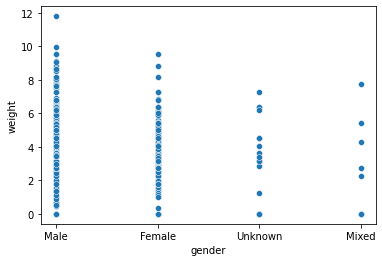

In [9]:
sns.scatterplot(x='gender', y='weight', data=cat_df, ci=None)
plt.show()



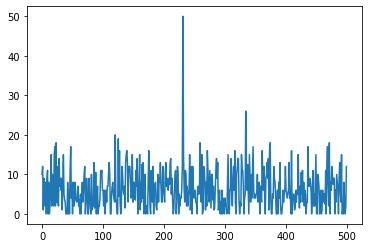

In [10]:
plt.plot(cat_df['age'])
plt.show()